In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers , optimizers
from  tensorflow.keras.applications.resnet50 import ResNet50
from  tensorflow.keras.layers import *
from  tensorflow.keras.models import Model , load_model
from  tensorflow.keras.initializers import glorot_uniform
from  tensorflow.keras.utils import plot_model
from  tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras import backend as K


from IPython.display import display

In [2]:
# The dataset consits of x and y coordinates of 15 facial key points.
# Input image are of 96x96 pixels
# Image consists of only one color channel (gray-scale-images)
df = pd.read_csv('KeyFacialPoints.csv')
df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [3]:
df.shape

(2140, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [5]:
df['Image'][1]

'219 215 204 196 204 211 212 200 180 168 178 196 194 196 203 209 199 192 197 201 207 215 199 190 182 180 183 190 190 176 175 175 170 158 162 170 150 133 133 128 121 115 115 114 112 114 113 112 120 127 123 118 112 109 112 110 107 106 104 104 100 98 105 122 135 143 152 135 114 104 81 74 87 107 98 82 84 79 70 69 62 62 79 94 97 100 98 93 100 100 97 96 93 92 88 84 222 219 220 211 207 199 185 178 171 175 196 199 199 200 201 205 202 200 204 206 211 219 204 192 188 185 185 193 189 180 177 178 173 158 159 162 145 133 133 129 122 118 116 115 114 115 115 118 127 132 127 120 116 119 118 114 114 113 110 108 105 104 110 130 140 149 152 128 106 106 91 78 90 107 101 84 90 93 79 75 73 59 58 74 94 102 100 99 97 90 94 96 95 92 88 86 231 224 212 197 191 186 176 170 172 190 201 199 200 203 204 210 215 211 210 213 213 217 210 192 188 188 189 194 189 183 181 183 175 158 158 158 142 132 133 131 125 120 121 120 116 115 116 122 135 137 129 122 121 125 121 119 120 118 117 112 112 109 116 136 149 156 149 126 109 

In [6]:
df['Image'] =  df['Image'].apply(lambda x : np.fromstring(x , dtype ='int' , sep =' ').reshape(96,96))

In [7]:
df['Image'][1].shape

(96, 96)

In [8]:
df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [9]:
df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


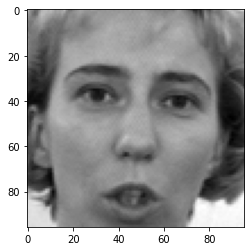

In [10]:
i = np.random.randint(1, len(df))
plt.imshow(df['Image'][i] , cmap ='gray')

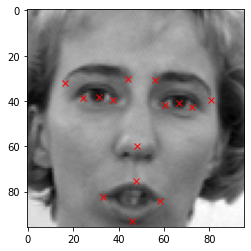

In [11]:
plt.figure()
plt.imshow(df['Image'][i] , cmap = 'gray')
for j in range(1,31,2):
    plt.plot(df.loc[i][j-1] , df.loc[i][j] , 'rx')

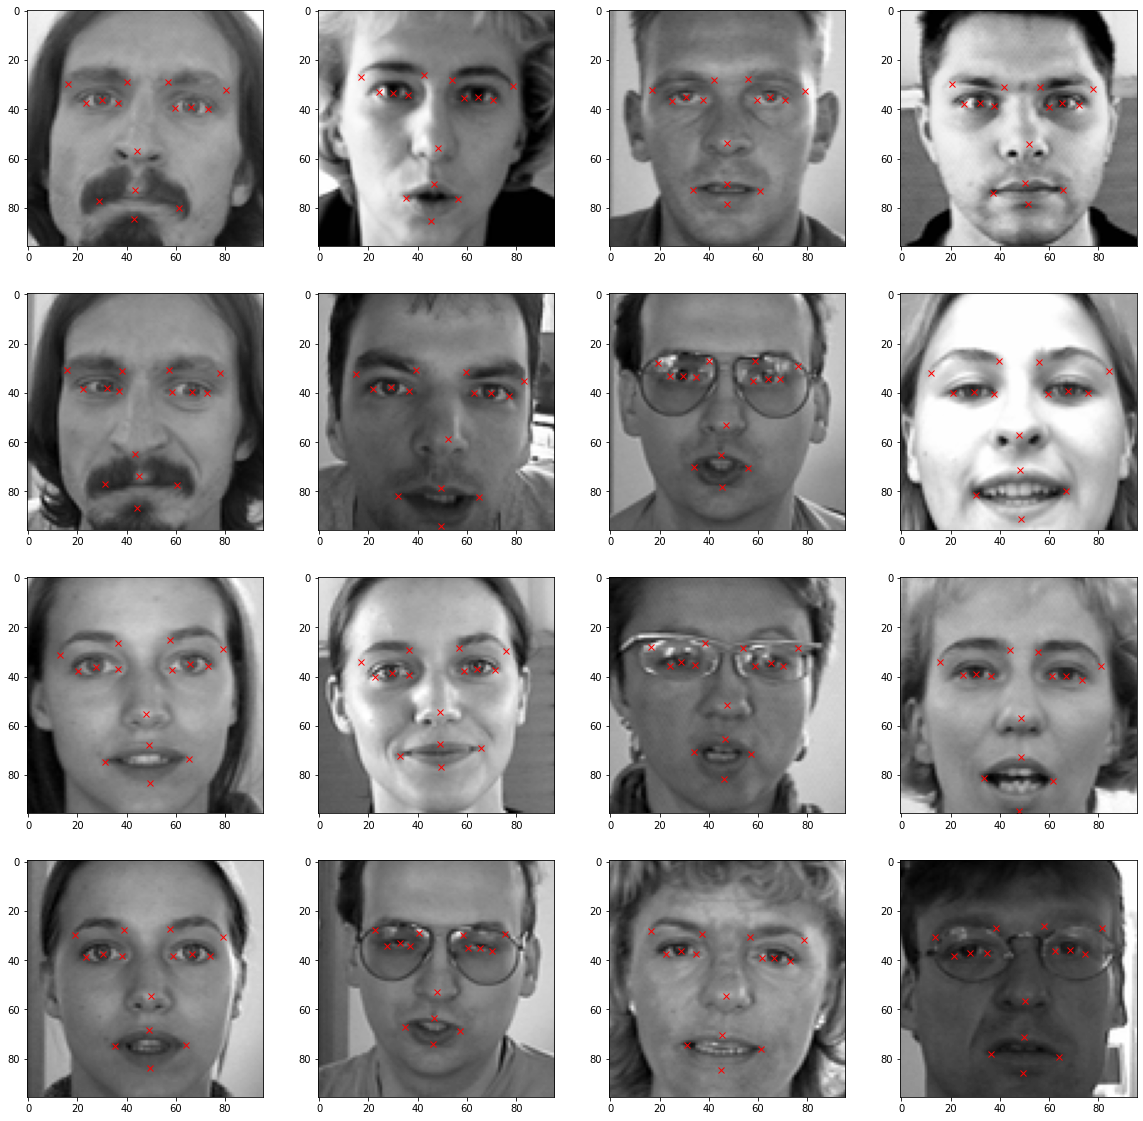

In [12]:
import random 

fig = plt.figure(figsize = (20,20))

for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    image = plt.imshow(df['Image'][i] , cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(df.loc[i][j-1] , df.loc[i][j] , 'rx')

In [13]:
# Preforming Data Augumentation
import copy
df_copy  =  copy.copy(df)

In [14]:
cols = df_copy.columns[:-1]
cols

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [15]:
df_copy['Image'][0]


array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [16]:
#Flipping the columns horizontally

df_copy['Image'] = df_copy['Image'].apply(lambda x : np.flip(x , axis =1))


In [17]:
df_copy['Image'][0]

array([[250, 250, 250, ..., 237, 236, 238],
       [251, 250, 249, ..., 236, 238, 235],
       [250, 251, 251, ..., 237, 236, 237],
       ...,
       [ 60,  57,  52, ..., 181, 183, 186],
       [ 78,  69,  61, ..., 207, 188, 189],
       [ 90,  75,  70, ..., 184, 184, 191]])

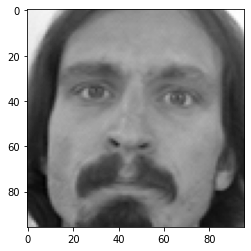

In [23]:
plt.imshow(df['Image'][0] , cmap = 'gray')

In [19]:
for i in range(len(cols)):
    if i%2 == 0:# Selecting the even columns (i.e only the x - coordinates)
        df_copy[cols[i]] = df_copy[cols[i]].apply(lambda x : 96. -  float(x))

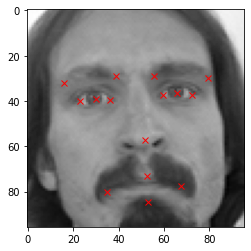

In [20]:
plt.imshow(df_copy['Image'][0] , cmap = 'gray')
for j in range(1,31,2):
        plt.plot(df_copy.loc[0][j-1] , df_copy.loc[0][j] , 'rx')

In [21]:
df_augumented = np.concatenate((df, df_copy)) # Adding the augumented dataset and  original dataset

In [22]:
df_augumented.shape

(4280, 31)

In [23]:
# Adjusting the brightness of the image
df_copy = copy.copy(df)
df_copy['Image'] =  df['Image'].apply(lambda x : np.clip(random.uniform(1,2)*x, 0.0 , 255.0))
df_augumented =  np.concatenate((df_augumented ,df_copy))
df_augumented.shape

(6420, 31)

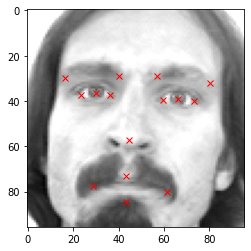

In [24]:
plt.imshow(df_copy['Image'][0] , cmap = 'gray')
for j in range(1,31,2):
        plt.plot(df_copy.loc[0][j-1] , df_copy.loc[0][j] , 'rx')

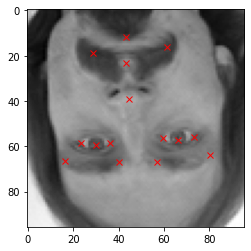

In [25]:
df_copy = copy.copy(df)
df_copy['Image'] =  df_copy['Image'].apply(lambda x : np.flip(x , axis =0))
df['Image'][0]
df_copy['Image'][0]
for i in range(len(cols)):
    if i%2 == 1:
        df_copy[cols[i]] = df_copy[cols[i]].apply(lambda x : 96. -  float(x))
        
plt.imshow(df_copy['Image'][0] , cmap = 'gray')
for j in range(1,31,2):
        plt.plot(df_copy.loc[0][j-1] , df_copy.loc[0][j] , 'rx')        

In [26]:
img =  df_augumented[:,30] # taking the image input 
img = img/255
X = np.empty((len(img), 96,96,1))
for i in range(len(img)):
    X[i,] = np.expand_dims(img[i] , axis = 2) #expand the dimentions from (96x96) to (96x96x1)
    
X = np.array(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [27]:
y = df_augumented[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [28]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , shuffle=True)

In [29]:
x_train.shape

(5136, 96, 96, 1)

In [30]:
x_test.shape

(1284, 96, 96, 1)

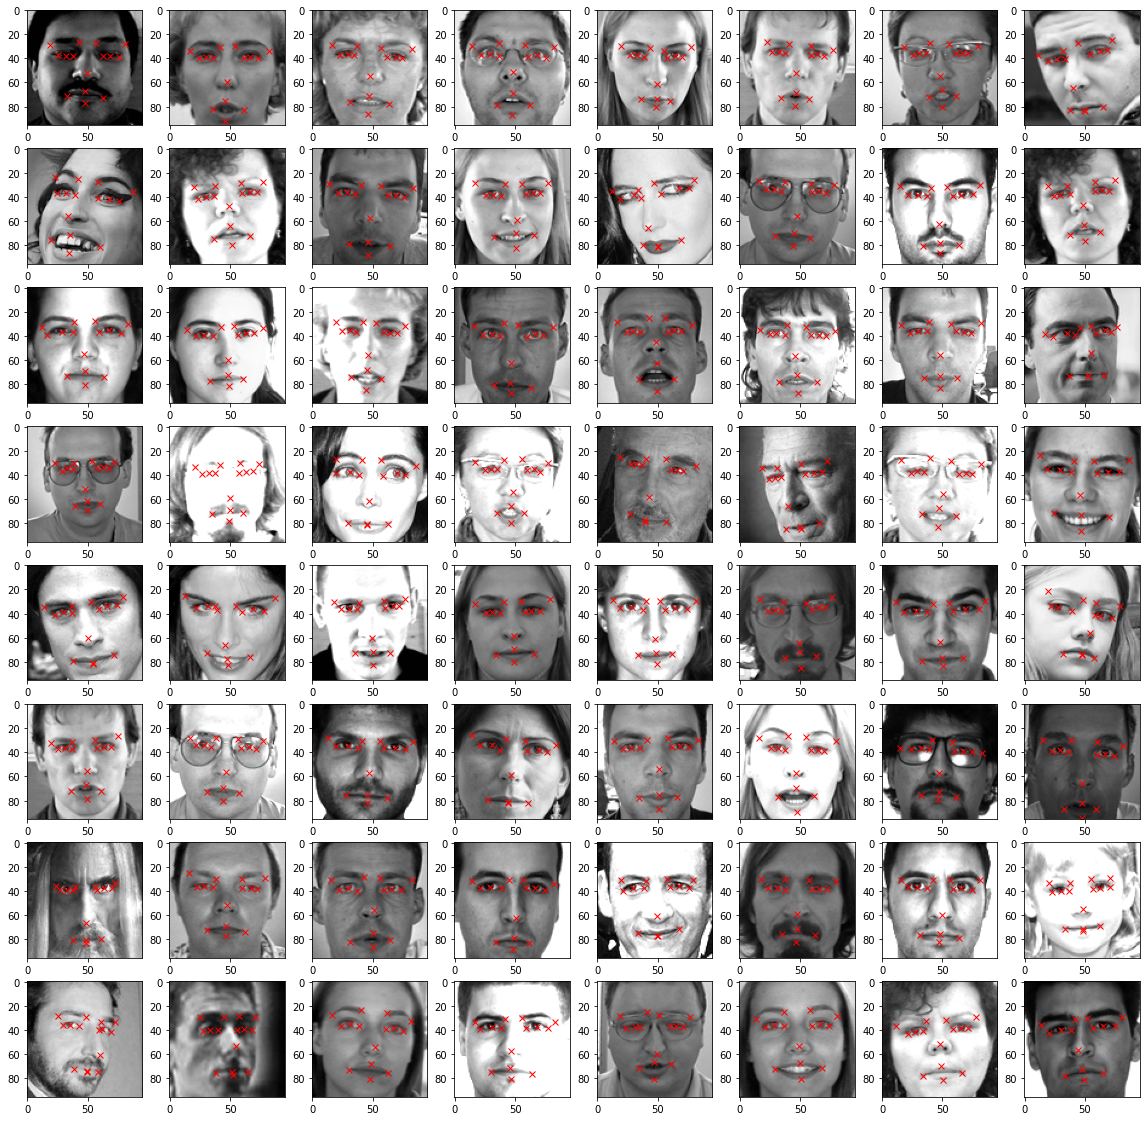

In [31]:
fig = plt.figure(figsize = (20,20))

for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    image = plt.imshow(x_train[i].reshape(96,96) , cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(y_train[i][j-1] , y_train[i][j] , 'rx')

In [32]:
def res_block(X, filter, stage):
    
  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 1
  X_copy = X
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

    
    
  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [33]:
input_shape = (96,96,1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# Stage #1
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# Stage #2
X = res_block(X, filter= [64,64,256], stage= 2)

# Stage #3
X = res_block(X, filter= [128,128,512], stage= 3)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model = Model( inputs= X_input, outputs = X)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [34]:
adam = tf.keras.optimizers.Adam(lr = 0.001, beta_1=0.9 , beta_2=0.999 , amsgrad=False)
model.compile(loss = 'mean_squared_error' , optimizer= adam  , metrics = ['accuracy'])

In [35]:
checkpointer = ModelCheckpoint(filepath="MyWeights.hdf5" , verbose = 1 , save_best_only=True)


In [36]:
history  =model.fit(x_train , y_train , batch_size=16 , epochs=100 , validation_split= 0.05 , callbacks= [checkpointer])

Epoch 1/100
305/305 [==============================] - ETA: 0s - loss: 298.9366 - accuracy: 0.6202
Epoch 00001: val_loss improved from inf to 314.63135, saving model to MyWeights.hdf5
305/305 [==============================] - 84s 277ms/step - loss: 298.9366 - accuracy: 0.6202 - val_loss: 314.6313 - val_accuracy: 0.7160
Epoch 2/100
305/305 [==============================] - ETA: 0s - loss: 231.8068 - accuracy: 0.6573
Epoch 00002: val_loss improved from 314.63135 to 226.90948, saving model to MyWeights.hdf5
305/305 [==============================] - 91s 297ms/step - loss: 231.8068 - accuracy: 0.6573 - val_loss: 226.9095 - val_accuracy: 0.7082
Epoch 3/100
305/305 [==============================] - ETA: 0s - loss: 118.5460 - accuracy: 0.6434
Epoch 00003: val_loss improved from 226.90948 to 189.71617, saving model to MyWeights.hdf5
305/305 [==============================] - 90s 297ms/step - loss: 118.5460 - accuracy: 0.6434 - val_loss: 189.7162 - val_accuracy: 0.7160
Epoch 4/100
305/305 [=

Epoch 57/100
305/305 [==============================] - ETA: 0s - loss: 40.0053 - accuracy: 0.7278
Epoch 00057: val_loss did not improve from 78.11529
305/305 [==============================] - 96s 316ms/step - loss: 40.0053 - accuracy: 0.7278 - val_loss: 89.4219 - val_accuracy: 0.6965
Epoch 58/100
305/305 [==============================] - ETA: 0s - loss: 39.7944 - accuracy: 0.7210
Epoch 00058: val_loss did not improve from 78.11529
305/305 [==============================] - 95s 312ms/step - loss: 39.7944 - accuracy: 0.7210 - val_loss: 88.5953 - val_accuracy: 0.7121
Epoch 59/100
305/305 [==============================] - ETA: 0s - loss: 43.1161 - accuracy: 0.7083
Epoch 00059: val_loss did not improve from 78.11529
305/305 [==============================] - 91s 300ms/step - loss: 43.1161 - accuracy: 0.7083 - val_loss: 88.0511 - val_accuracy: 0.7626
Epoch 60/100
305/305 [==============================] - ETA: 0s - loss: 40.1996 - accuracy: 0.7256
Epoch 00060: val_loss did not improve fr

Epoch 86/100
305/305 [==============================] - ETA: 0s - loss: 35.9098 - accuracy: 0.7647
Epoch 00086: val_loss did not improve from 78.11529
305/305 [==============================] - 88s 289ms/step - loss: 35.9098 - accuracy: 0.7647 - val_loss: 82.3508 - val_accuracy: 0.7432
Epoch 87/100
305/305 [==============================] - ETA: 0s - loss: 35.4420 - accuracy: 0.7526
Epoch 00087: val_loss did not improve from 78.11529
305/305 [==============================] - 89s 291ms/step - loss: 35.4420 - accuracy: 0.7526 - val_loss: 83.2994 - val_accuracy: 0.7315
Epoch 88/100
305/305 [==============================] - ETA: 0s - loss: 35.4912 - accuracy: 0.7606
Epoch 00088: val_loss did not improve from 78.11529
305/305 [==============================] - 88s 289ms/step - loss: 35.4912 - accuracy: 0.7606 - val_loss: 82.0757 - val_accuracy: 0.7510
Epoch 89/100
305/305 [==============================] - ETA: 0s - loss: 35.3814 - accuracy: 0.7581
Epoch 00089: val_loss improved from 78.1

In [37]:
model_json = model.to_json()
with open("My_KeyPointDectector.json","w" ) as json_file:
    json_file.write(model_json)

In [38]:
result = model.evaluate(x_test,y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 3s 83ms/step - loss: 77.6985 - accuracy: 0.7407
Accuracy : 0.7406542301177979


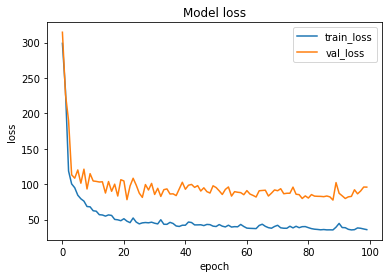

In [39]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [40]:
# Make prediction using the testing dataset
df_predict = model.predict(x_test)

In [41]:
# Print the rmse loss values

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE value : {}".format(rms))

RMSE value : 8.814672756860965


In [42]:
df_predict= pd.DataFrame(df_predict, columns = cols)
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,69.396553,38.700684,31.350702,36.408916,62.333664,39.621082,77.085320,39.774593,39.496956,38.291660,...,56.868744,60.083748,65.100746,78.412605,31.153925,76.814262,50.802471,78.034836,50.003712,80.177673
1,63.601646,35.336964,30.157728,36.222866,56.598152,36.947731,71.065392,35.477905,37.268875,37.480316,...,48.161598,60.231651,63.417721,71.130936,32.268421,71.879936,48.059990,73.832504,48.033276,76.430641
2,65.681763,36.648037,27.053389,37.887405,58.701691,37.637215,73.980583,37.161808,34.663334,38.480839,...,47.346245,57.394394,68.657379,71.410202,27.588533,72.407707,47.969448,69.204918,48.167465,85.951553
3,66.866112,37.257484,27.696209,36.447414,60.331627,37.860844,73.578156,38.138138,34.326424,37.382153,...,47.728539,55.797134,63.075737,75.569313,31.607098,74.993370,47.311207,71.432976,47.094078,83.656967
4,65.142830,39.593254,30.832903,35.465359,58.324661,39.969479,72.427437,41.205635,37.594482,37.459457,...,45.673378,57.227226,58.729851,76.136375,29.161570,72.451797,43.843983,73.180710,43.147823,78.517838


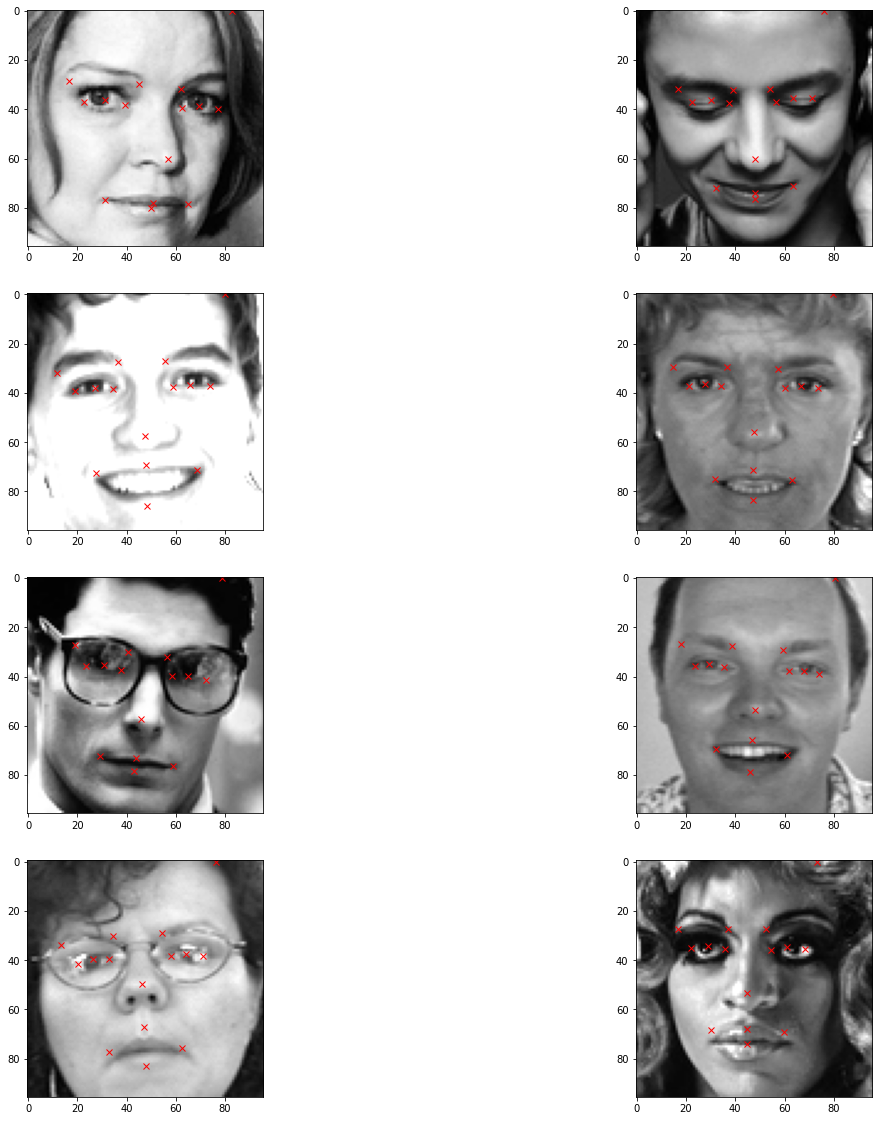

In [45]:
fig = plt.figure(figsize=(20, 20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(x_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')